In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(4, 2)
[[335 208]
 [335 291]
 [469 291]
 [469 208]]
[[358 315]
 [440 318]
 [445 185]
 [363 182]]
<class 'numpy.uint8'>


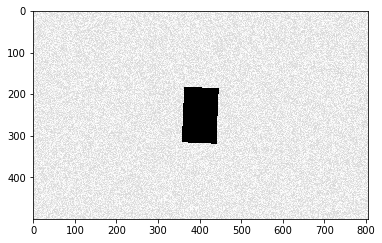

In [165]:
w, h = 500, int(500*1.61)
imageOriginal = np.ones((w,h), dtype=np.uint8)*200 + np.random.rand(w,h)*40
l1, l2 = int(h/6), int(w/6)
x, y = int(h/2 + l1/2), int(w/2 + l2/2)

box = np.array([[x-l1, y-l2], [x-l1,y], [x, y], [x, y-l2]])
origin = np.array([x - int(l1/2), y - int(l2/2)])
print(box.shape)
print(box)

angle = 88 * np.pi / 180
c, s = np.cos(angle), np.sin(angle)
rot = np.array([[c, -s], [s, c]])
box -= origin
box = box.dot(rot).astype(np.int)
box += origin

print(box)
imageOriginal = cv.drawContours(imageOriginal,[box],0,(0,191,255), -1).astype(np.uint8)

plt.imshow(imageOriginal, cmap='gray')

image = imageOriginal.copy()
print(type(image[0,0]))

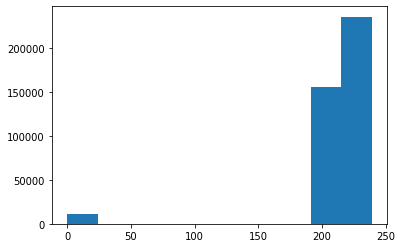

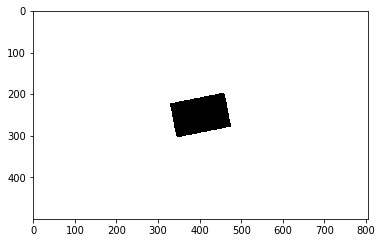

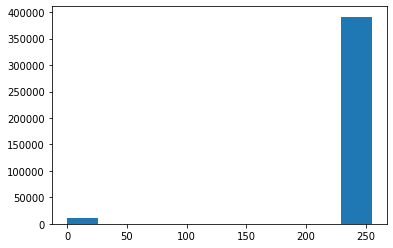

[  0 255]


In [93]:
# Normalise and treat image:
# image = cv.normalize(image, 255)
plt.hist(image.flatten())
plt.show()

blur = cv.GaussianBlur(image,(5,5),0)
ret3, image = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(image, cmap='gray')
plt.show()

plt.hist(image.flatten())
plt.show()
print(np.unique(image))

[442, 398, 359, 403] [251, 316, 248, 182]
1
87.86308914624274


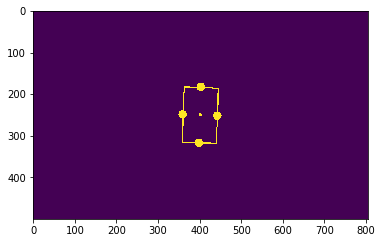

In [166]:
bricks = (image < 20).astype(np.uint8)
_, contours, hierarchy = cv.findContours(bricks, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

drawonme = np.zeros(bricks.shape, dtype=np.uint8)
cv.drawContours(drawonme, contours, -1, (255, 255, 255), thickness=2)

for contour in contours:
    M = cv.moments(contour)
    if M['m00'] == 0:
        break
    X = int(M['m10'] / M['m00'])
    Y = int(M['m01'] / M['m00'])
    
    drawonme = cv.circle(drawonme, (X, Y), 4, 255, -1)
    
    rect = cv.minAreaRect(contour)
    (x, y), (w, h), angle = rect
#     angle = angle * 180 / np.pi  % 360
#     if angle < -45:
#         angle = (angle + 90)
#     print("angle", angle)

    box = cv.boxPoints(rect)
    box = np.int0(box)
#     for pt in box:
#         drawonme = cv.circle(drawonme, (pt[0], pt[1]), 10, 255, -1)
#     print(box, box.shape)
    
    #lengths = np.array([np.sqrt((box[i - 1, 0] - box[i, 0]) ** 2 + (box[i - 1, 1] - box[i, 1]) ** 2) for i in range(4)])
    
    # Find midpoints:
    midX = [np.int0((box[i - 1, 0] + box[i, 0])/2) for i in range(4)]
    midY = [np.int0((box[i - 1, 1] + box[i, 1])/2) for i in range(4)]
    for x, y in zip(midX, midY):
        drawonme = cv.circle(drawonme, (x, y), 10, 255, -1)
    print(midX, midY)
    
    # Find longest side:
    candidates = np.sqrt(np.array([(midX[i]-midX[j])**2 + (midY[i]-midY[j])**2 for i,j in zip([0,1],[2,3])]))
    longest_side = candidates.argmax()
    sign = np.sign(midX[longest_side+2] - midX[longest_side])
    print(sign)
    
    # Find angle:
    pts = np.array([[midX[i], midY[i]] for i in longest_side + [0,2]])
    angle = sign*np.arccos(np.abs(pts[1] - pts[0]).dot(np.array([1,0]))/np.linalg.norm(pts[1] - pts[0])) * 180 / np.pi
    print(angle)
    
#     distances = [np.sqrt((x - X)**2 + (y - Y)**2) for x, y in zip(midX, midY)]
#     print(distances)
#     d = max(distances)
#     idx = [distance/d < 0.9 for distance in distances]
#     pts = np.array([[x, y] for i, (x, y) in enumerate(zip(midX, midY)) if idx[i] == True])
#     for pt in pts:
#         drawonme = cv.circle(drawonme, (pt[0], pt[1]), 10, 255, -1)
#     print("pts", pts, pts.shape)
    
#     test = np.abs(pts[1] - pts[0])
#     print("test", test, test.shape)

#     print(np.abs(pts[1] - pts[0]).dot(pts.T))
#     angle = np.arccos(np.abs(pts[1] - pts[0]).dot(np.array([1,0]))/np.linalg.norm(pts[1] - pts[0]))
# #     angle = np.arccos(np.clip(np.dot(pts, np.array([[0,0], [0,1]])), -1.0, 1.0))
# #     angle = np.arctan2(pts, np.array([[0,0], [0,1]])) * 180 / np.pi
#     print("angle", (-angle + np.pi/2)* 180 / np.pi)

plt.imshow(drawonme)